# Data Exploration and Analysis

In this notebook, I am going to analyze the "spotify-audio-features-final" dataset which is obtained at the end of [the data preparation and cleaning process](data-preparation-and-cleaning.ipynb).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DATA/spotify-audio-features-final.csv")

## Correlation between all features in the dataset

### Correlation Heatmap

Positive correlation is highlighted in lighter colors whereas negative correlation is in darker colors.

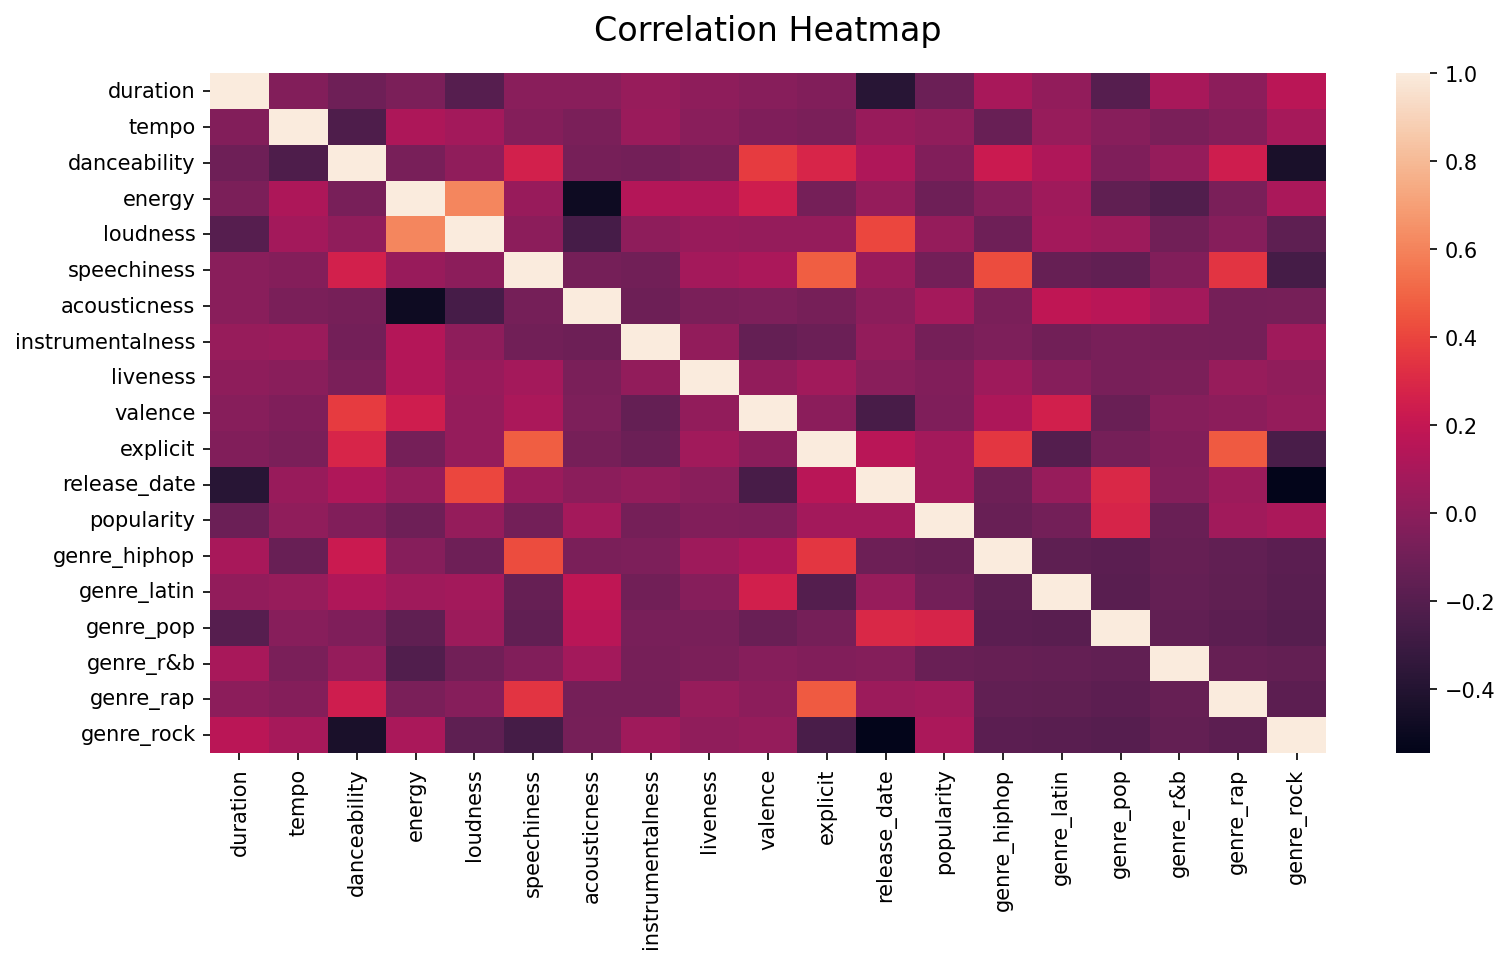

In [3]:
plt.figure(figsize=(12, 6), dpi=150)
heatmap = sns.heatmap(df.corr())
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=16);

It appears that most of the variables are not significantly correlated, but a few show some correlation.

**Notable positive correlations:**
* energy and loudness
* explicit and speechness
* danceabilty and valence

**Notable negative correlations:**
* energy and acousticness

Unfortunately, there aren't really any surprising correlations. Explicitness and speechiness are positively correlated because as you increase the number of words in a song, there is more opportunity for the song to contain swear words. Other correlations like energy and loudness are likely correlated because of the way these attributes are calculated. In the Spotify documentation, loudness is one of the factors that determines a song's energy value. Danceability and valence is an interesting correlation, but it isn't very strong. It makes sense that songs that are more positive would be more danceable and like the correlation between loudness and energy, it's possible that the danceability attribute is dependent on valence.

### Features Correlating with Popularity

The map below shows the strength of the correlation between every feature that we want to include in our model and the label. (Popularity).

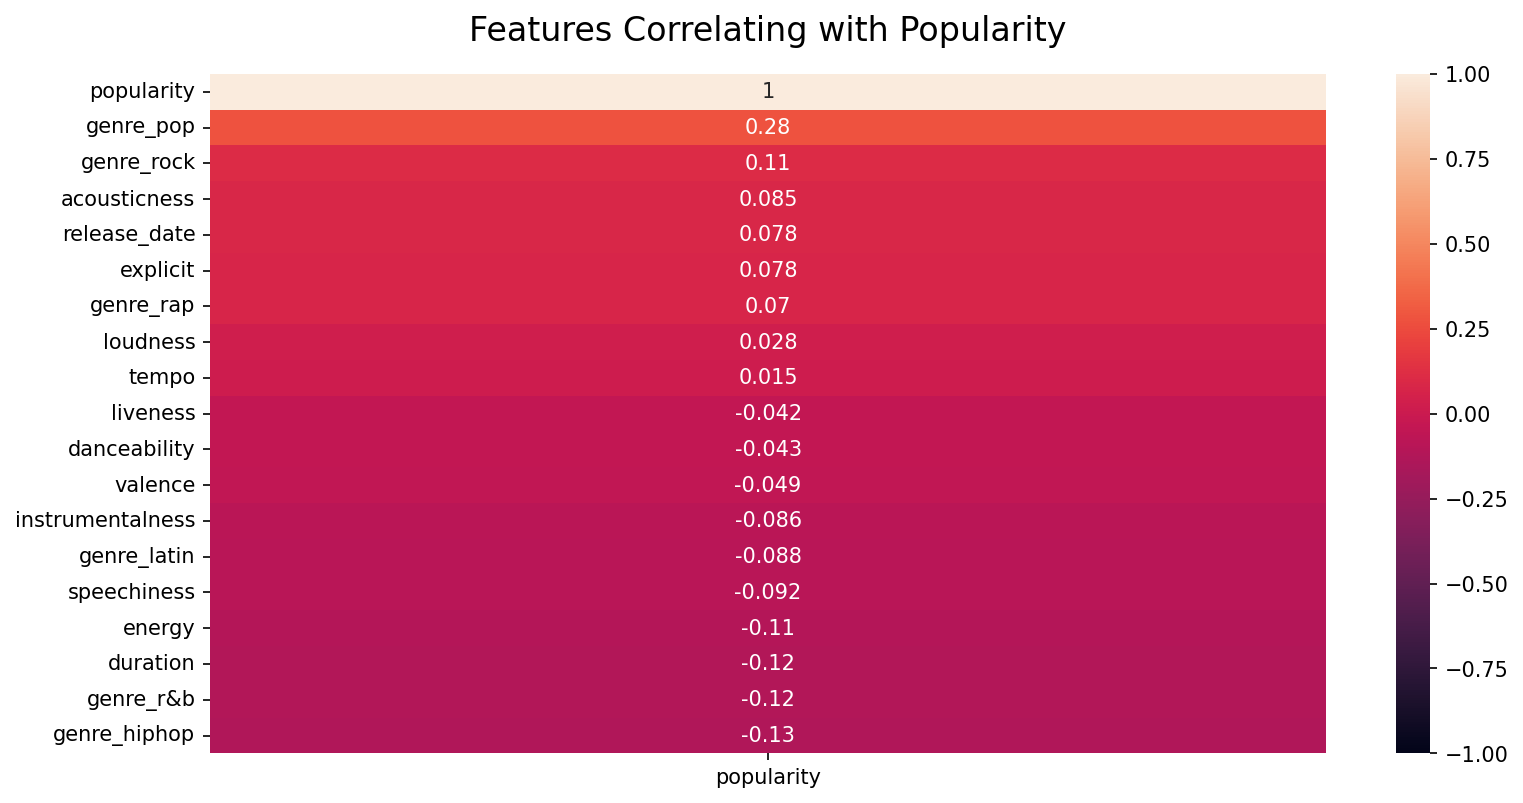

In [4]:
plt.figure(figsize=(12, 6), dpi=150)
heatmap = sns.heatmap(df.corr()[['popularity']].sort_values(by='popularity', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Popularity', fontdict={'fontsize':16}, pad=16);

## Visualizations

### Counts of some features 

<AxesSubplot:xlabel='popularity', ylabel='Count'>

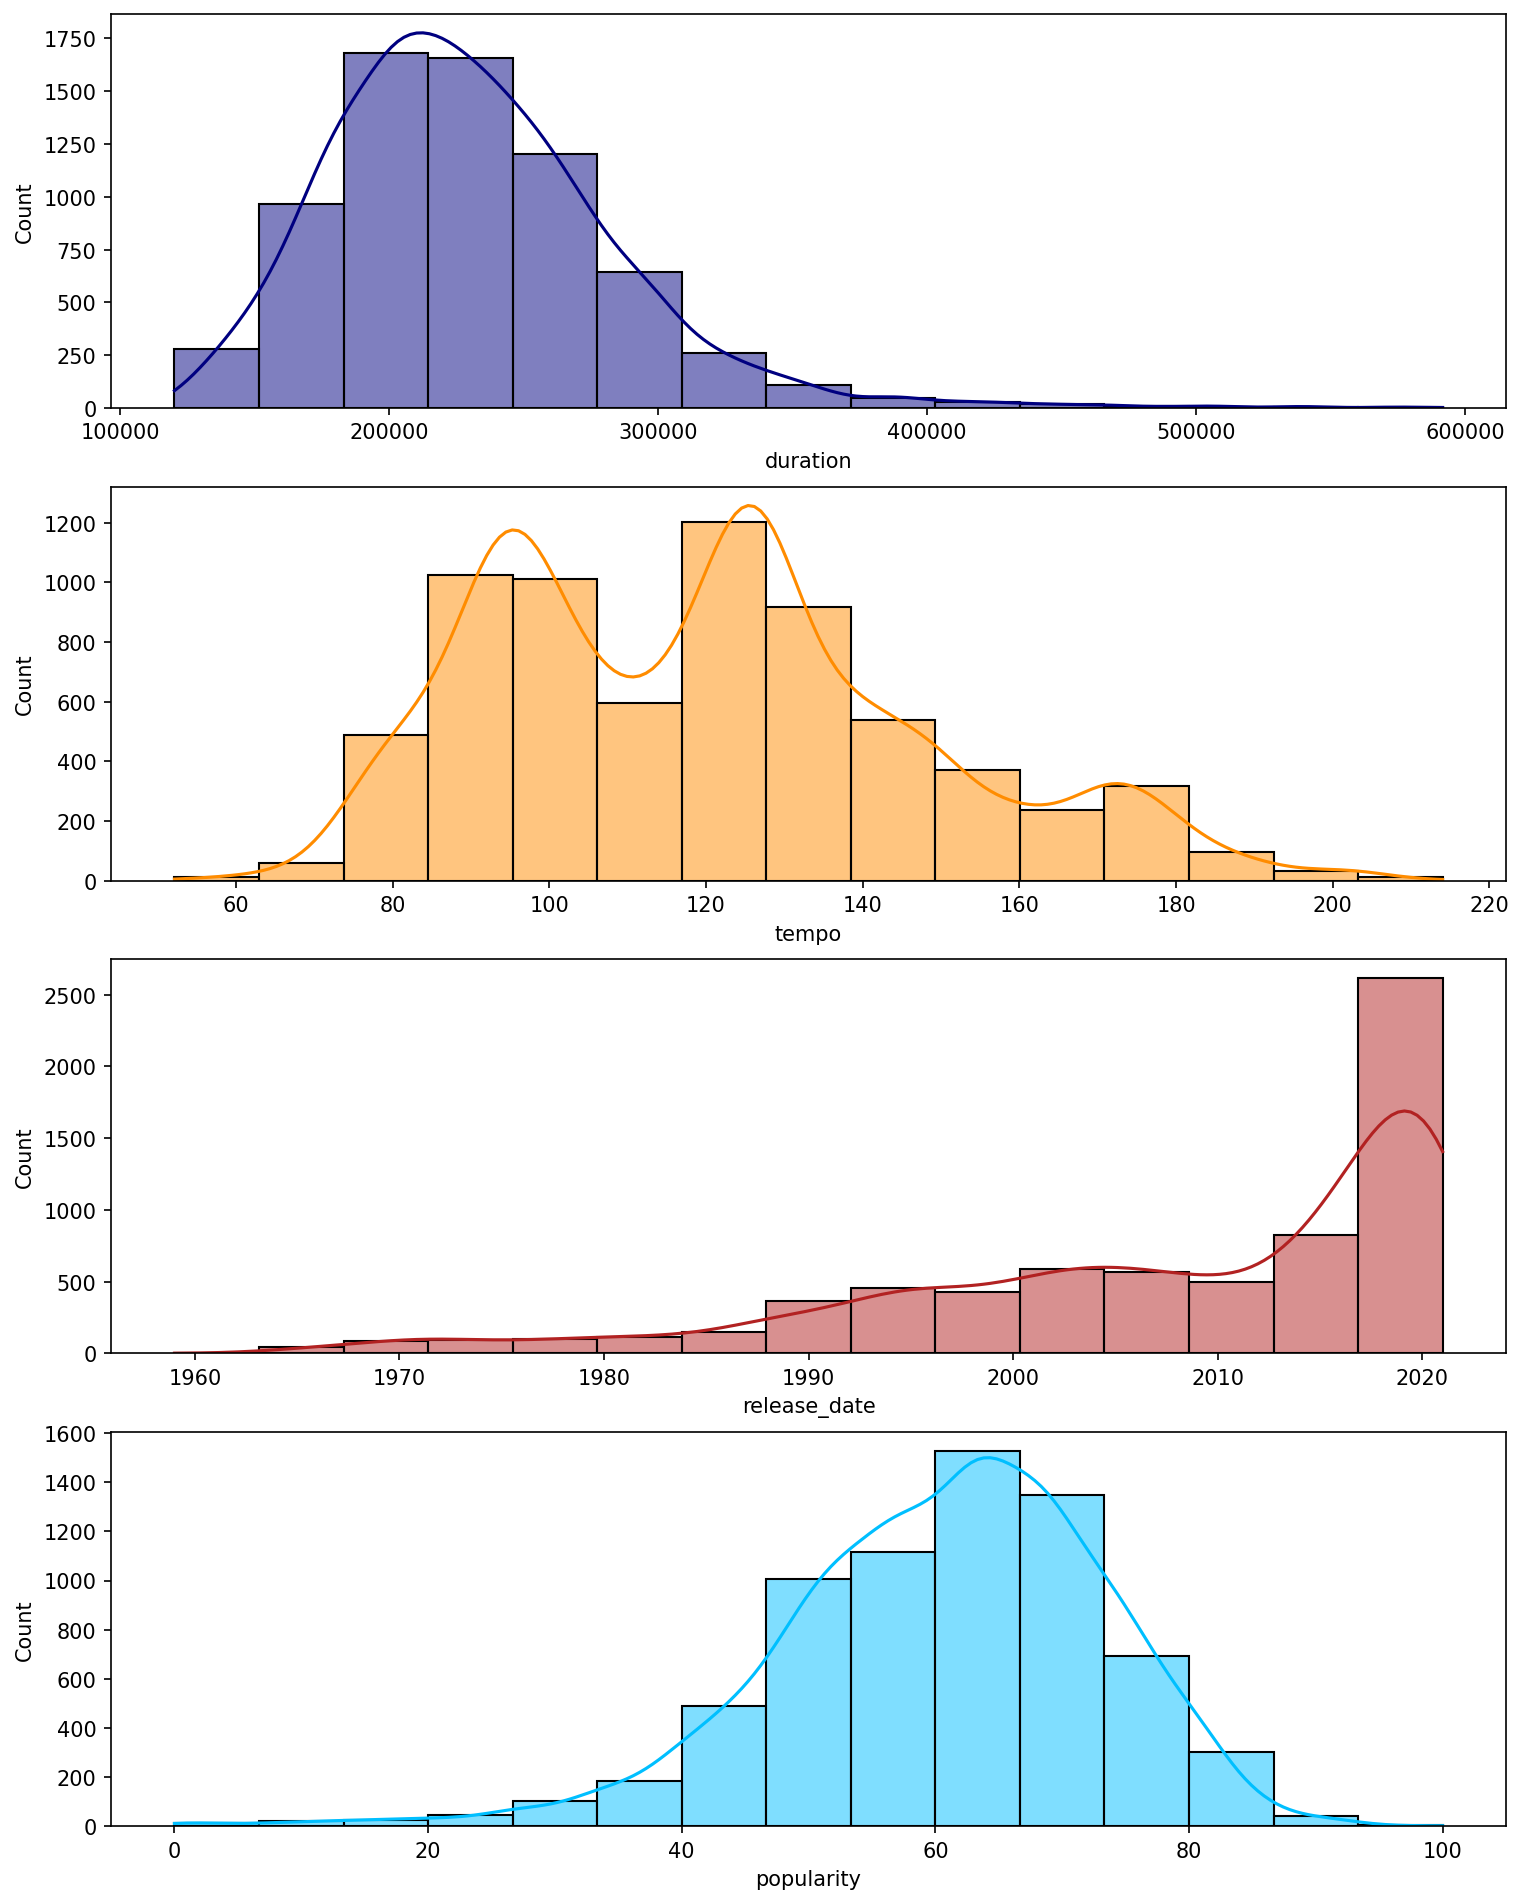

In [5]:
fig, ax = plt.subplots(4,1, figsize=(12,16), dpi=150) 
sns.histplot(data=df, x="duration", kde=True, color="navy", bins=15, ax=ax[0])
sns.histplot(data=df, x="tempo", kde=True, color="darkorange", bins=15, ax=ax[1])
sns.histplot(data=df, x="release_date", kde=True, color="firebrick", bins=15, ax=ax[2])
sns.histplot(data=df, x="popularity", kde=True, color="deepskyblue", bins=15, ax=ax[3])

### Visualizing the distribution of some audio features

<AxesSubplot:ylabel='Density'>

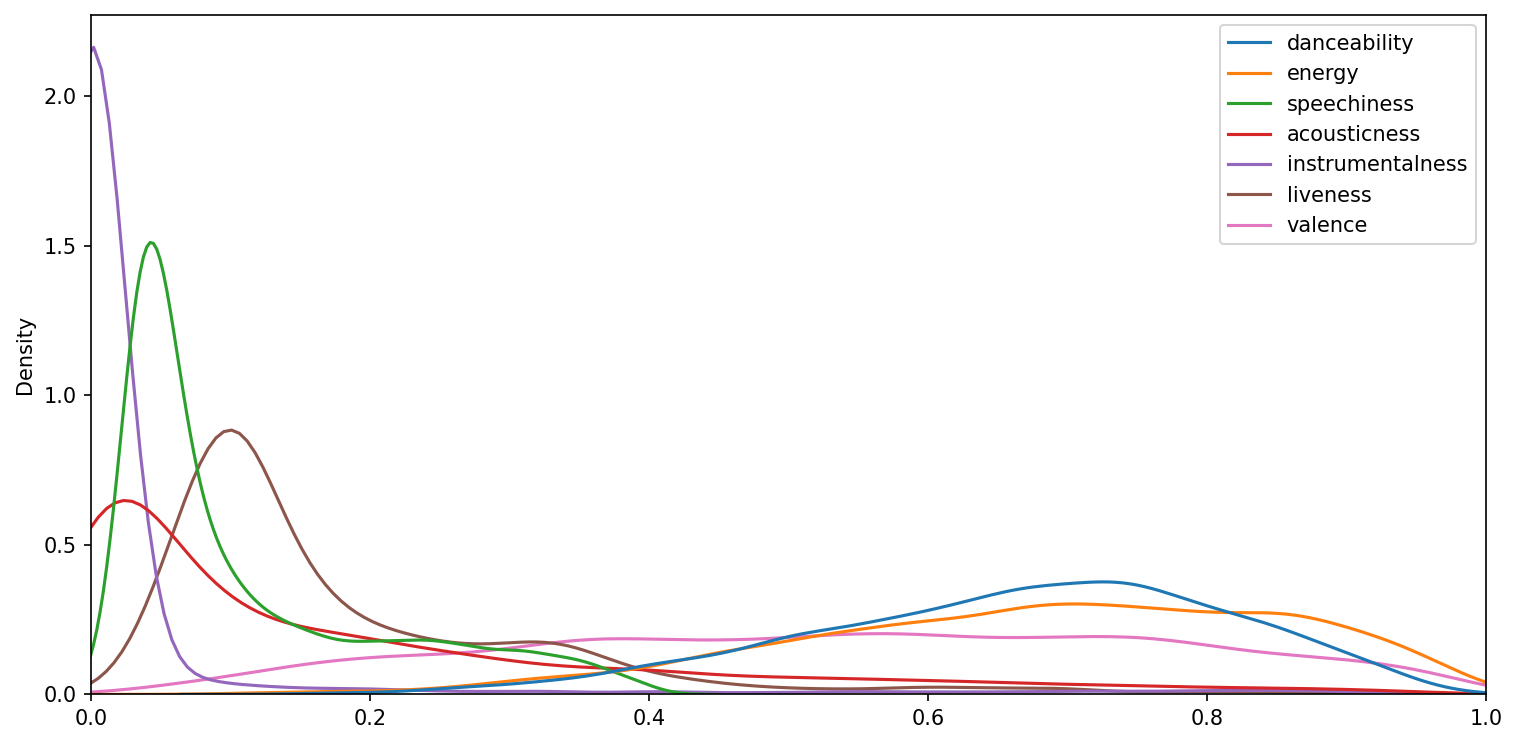

In [6]:
plt.figure(figsize=(12, 6), dpi=150)
plt.xlim([0, 1])
sns.kdeplot(data=df[["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]])

## Final thoughts

Overall, this was an interesting dataset to explore. We examined the correlation between all features and the features correlating with popularity. We also observed the distribution of these features. In the future, I think it would be interesting to expand the analysis by using genre values since they have decent correlation with the label that we try to predict.